# Architecture
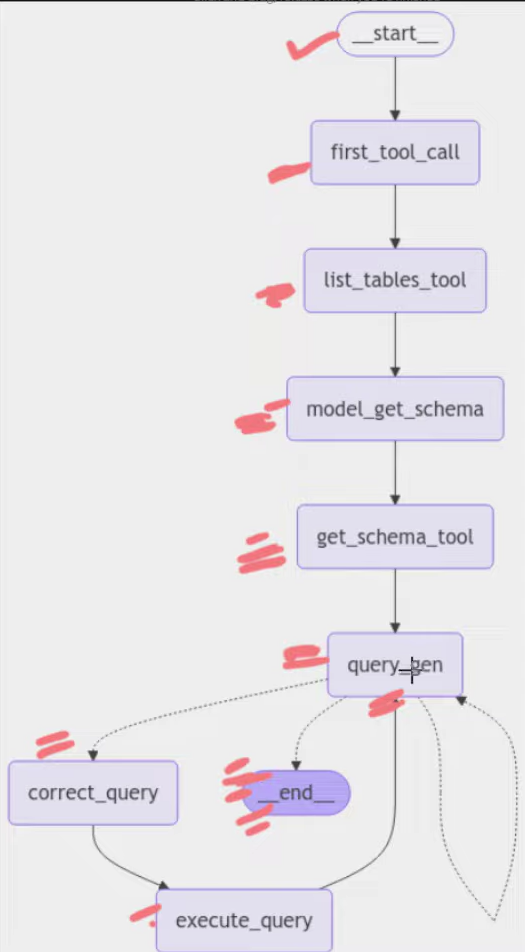

In [1]:
import sqlite3
connection = sqlite3.connect("employee2.db")
connection

In [2]:
ursor = connection.cursor()

In [3]:
table_creation_query1 = """
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [4]:
table_creation_query2 = """
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [5]:
table_creation_query3 = """
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);
"""

In [6]:
cursor = connection.cursor()
cursor.execute(table_creation_query1)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [7]:
insert_query_employees = """
INSERT INTO employees (first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?);
"""

In [8]:
insert_query_customers = """
INSERT INTO customers (first_name, last_name, email, phone)
VALUES (?, ?, ?, ?);
"""

In [9]:
insert_query_orders = """
INSERT INTO orders (customer_id, order_date, amount)
VALUES (?, ?, ?);
"""

In [10]:
# employee_data = [
#     ("John", "Doe", "john.doe@example.com", "2024-01-15", 60000.00),
#     ("Jane", "Smith", "jane.smith@example.com", "2023-11-20", 55000.00),
#     ("Robert", "Brown", "robert.brown@example.com", "2022-12-05", 62000.00),
#     ("Emily", "Davis", "emily.davis@example.com", "2024-02-10", 58000.00),
#     ("Michael", "Wilson", "michael.wilson@example.com", "2021-09-25", 70000.00),
#     ("Sarah", "Taylor", "sarah.taylor@example.com", "2023-03-18", 53000.00),
#     ("David", "Anderson", "david.anderson@example.com", "2022-07-30", 65000.00),
#     ("Laura", "Martinez", "laura.martinez@example.com", "2020-05-12", 72000.00),
#     ("James", "Harris", "james.harris@example.com", "2019-08-22", 68000.00),
#     ("Olivia", "Clark", "olivia.clark@example.com", "2021-01-10", 59000.00)
# ]

# customer_data = [
#     ("Alice", "Johnson", "alice.johnson@example.com", "9876543210"),
#     ("Mark", "White", "mark.white@example.com", "9123456789"),
#     ("Sophia", "Garcia", "sophia.garcia@example.com", "9345678912"),
#     ("William", "Lee", "william.lee@example.com", "9567891234"),
#     ("Isabella", "Hall", "isabella.hall@example.com", "9789012345"),
#     ("Ethan", "Young", "ethan.young@example.com", "9901234567"),
#     ("Mia", "Scott", "mia.scott@example.com", "9112233445"),
#     ("Daniel", "King", "daniel.king@example.com", "9223344556"),
#     ("Emma", "Wright", "emma.wright@example.com", "9334455667"),
#     ("Benjamin", "Lopez", "benjamin.lopez@example.com", "9445566778")
# ]

# order_data = [
#     (1, "2024-01-05", 250.75),
#     (2, "2024-01-12", 120.00),
#     (3, "2024-02-03", 560.50),
#     (4, "2024-02-10", 310.25),
#     (5, "2024-03-01", 999.99),
#     (6, "2024-03-08", 150.75),
#     (7, "2024-04-02", 425.00),
#     (8, "2024-04-10", 275.30),
#     (9, "2024-05-05", 880.90),
#     (10, "2024-05-15", 340.40)
# ]

In [11]:
cursor.executemany(insert_query_employees, employee_data)
cursor.executemany(insert_query_customers, customer_data)
cursor.executemany(insert_query_orders, order_data)

In [12]:
connection.commit()
# connection.close()

In [13]:
cursor.execute("select * from employees;")

for row in cursor.fetchall():
    print(row)


(1, 'John', 'Doe', 'john.doe@example.com', '2024-01-15', 60000.0)
(2, 'Jane', 'Smith', 'jane.smith@example.com', '2023-11-20', 55000.0)
(3, 'Robert', 'Brown', 'robert.brown@example.com', '2022-12-05', 62000.0)
(4, 'Emily', 'Davis', 'emily.davis@example.com', '2024-02-10', 58000.0)
(5, 'Michael', 'Wilson', 'michael.wilson@example.com', '2021-09-25', 70000.0)
(6, 'Sarah', 'Taylor', 'sarah.taylor@example.com', '2023-03-18', 53000.0)
(7, 'David', 'Anderson', 'david.anderson@example.com', '2022-07-30', 65000.0)
(8, 'Laura', 'Martinez', 'laura.martinez@example.com', '2020-05-12', 72000.0)
(9, 'James', 'Harris', 'james.harris@example.com', '2019-08-22', 68000.0)
(10, 'Olivia', 'Clark', 'olivia.clark@example.com', '2021-01-10', 59000.0)


In [14]:
cursor.execute("select first_name from employees where salary > 50000.0;")

In [15]:
cursor.fetchall()

[('John',),
 ('Jane',),
 ('Robert',),
 ('Emily',),
 ('Michael',),
 ('Sarah',),
 ('David',),
 ('Laura',),
 ('James',),
 ('Olivia',)]

In [16]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

In [17]:
cursor.fetchall()

[('employees',), ('sqlite_sequence',), ('customers',), ('orders',)]

### Using GROQ_API_KEY

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"]= GROQ_API_KEY

GROQ_API_KEY = https://console.groq.com/keys

model = https://console.groq.com/docs/models


In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192")

### Use Ollama

In [31]:
import subprocess
import time
import requests
from langchain_community.llms import Ollama

# Function to check if Ollama is running on localhost:11434
def check_ollama_running():
    try:
        response = requests.get("http://localhost:11434")
        print(f"Response Status: {response.status_code}")
        if response.status_code == 200:
            print("Ollama server is already running.")
            return True
        else:
            print("Ollama server is not responding.")
            return False
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to Ollama server: {e}")
        return False

# Function to start Ollama if it's not running
def start_ollama_server():
    try:
        print("Starting Ollama server...")
        subprocess.Popen(["ollama", "run"])  # This will start Ollama server
        time.sleep(5)  # Wait for a few seconds to ensure the server is up
        print("Ollama server started.")
    except Exception as e:
        print(f"Error starting Ollama server: {e}")

# Start Ollama if it's not running
if not check_ollama_running():
    start_ollama_server()

Response Status: 200
Ollama server is already running.


In [32]:
from langchain_community.llms import Ollama
# llm = Ollama(model="llama3")
llm = Ollama(model="llama3.1")
llm

Ollama(model='llama3.1')

In [33]:
llm.invoke("hello").content

OllamaEndpointNotFoundError: Ollama call failed with status code 404. Maybe your model is not found and you should pull the model with `ollama pull llama3.1`.

langchain_SQL_Database = https://python.langchain.com/v0.1/docs/integrations/toolkits/sql_database/

In [ ]:
from langchain_community.utilities import SQLDatabase # interacts with data in databases and helps querying and processing data automatically.
db = SQLDatabase.from_uri("sqlite:///employee.db")

In [ ]:
print("Dialect:", db.dialect)
print("Usable tables:", db.get_usable_table_names())

In [ ]:
query_result = db.run("SELECT * FROM employees ;")
print("Query result from Employees table: \n", query_result)

SQLDatabase_Toolkit = https://python.langchain.com/docs/integrations/tools/sql_database/
#### **SQLDatabaseToolkit** provides interface for LLM Agents(like OpenAI's GPT models) to interact with SQL databases.

In [ ]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit
toolkit=SQLDatabaseToolkit(db=db,llm=llm)
tools=toolkit.get_tools()
tools

In [ ]:
for tool in tools:
    print(tool.name)

In [ ]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None) # 	Lists all the tables in the database.
list_tables_tool

In [ ]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None) # Provides detailed schema information about a table.
get_schema_tool

In [ ]:
print(list_tables_tool.invoke(""))

In [ ]:
print(get_schema_tool.invoke("employees"))

## defines a custom tool name **db_query_tool**
this custom tool **db_query_tool** is use by llm agent to execute sql query and fecth the data from databases.

In [ ]:
from langchain_core.tools import tool
@tool # decorator is used to convert a Python function into a tool that an LLM agent can use.
def db_query_tool(query: str) -> str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result = db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [ ]:
print(db_query_tool.invoke("SELECT * FROM Employees LIMIT 10;"))

```python
class Database:
    def run_no_throw(self, query):
        try:
            # Assume `self.connection` is a valid database connection
            cursor = self.connection.cursor()
            cursor.execute(query)
            return cursor.fetchall()  # Or another method to retrieve results
        except Exception as e:
            print(f"Error executing query: {e}")
            return None  # Fallback value
```

In [ ]:
from pydantic import BaseModel, Field
from typing import TypedDict
from typing_extensions import Annotated #  used to add extra metadata to the type
from langgraph.graph.message import AnyMessage, add_messages

In [ ]:
# The main purpose of the SubmitFinalAnswer class is to store the final answer as a string, by validating with BaseModel and
# BaseModel ensure that final answer is in string

class SubmitFinalAnswer(BaseModel): # making pydentic object to validate the final output where we define that final answer should be string.
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user") # final_answer must be a string

### **Real-World Example:**
- If this were used in a chat application or a logging system, the `State` class could represent the current state of a conversation or a log, where messages are dynamically added to the list.
- The `add_messages` could be responsible for ensuring that new messages are added in a specific way (e.g., ensuring they follow a particular format or structure).

The main purpose is to model a state (such as a chat or log) with a list of messages and add additional functionality to modify or manage the messages using `add_messages`.

In [ ]:
class State(TypedDict): # State means messages:  which is flow through out the workflow
    messages: Annotated[list[AnyMessage], add_messages] # add new message in AnyMessage in the form of list (nothing but just validating messages)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL should have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting identifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

query_check = query_check_prompt | llm.bind_tools([db_query_tool])

query_check.invoke({"messages": [("user", "SELECT * FROM Employees LIMIT 5;")]})

In [ ]:
query_check.invoke({"messages": [("user", "SELECT + FROM Employees LIMIT 5;")]})
query_check.query

In [ ]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

Output the SQL query that answers the input question without a tool call.

Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.

If you get an error while executing a query, rewrite the query and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer."""


query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system), ("placeholder", "{messages}")])

query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [ ]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode # converting custom tool into node in langraph

- `tool_calls=[...]` → This is a list containing a tool call request.
- - The AI is calling a tool named **sql_db_list_tables**, which suggests it is requesting a list of database tables.
- - `args={}` → No arguments are passed to the tool.
- - `id`=**tool_abcd123** → The tool call is given an ID (likely for tracking purposes).

In [ ]:
def first_tool_call(state: State) -> dict[str, list[AIMessage]]:
    return { # Returning a Dictionary with Messages
        "messages": [
            AIMessage(
                content="",
                tool_calls=[{"name": "sql_db_list_tables", "args": {}, "id": "tool_abcd123"}]
            )
        ]
    }


In [34]:
def handle_tool_error(state: State) -> dict:
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [ # constructs a dictionary with a messages key
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"], # ToolMessage includes the id of the tool call (tc["id"]) to identify which tool failed.
            )
            for tc in tool_calls
        ]
    }

# converting tools into node using ToolNode but if any error occurs then with_fallbacks handle error by calling function handle_tool_error
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

NameError: name 'State' is not defined

In [ ]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [ ]:
def should_continue(state: State) -> Literal[END, "correct_query", "query_gen"]:
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None): # if last_message = tool_calls then return END
        return END
    if last_message.content.startswith("Error:"): # if last_message contain error then return "query_gen"
        return "query_gen"
    else:
        return "correct_query" # else return "correct_query"

In [ ]:
def model_check_query(state: State) -> dict[str, list[AIMessage]]: # again checking the query weather generated query is correct or not
    """
    Use this tool to double-check if your query is correct before executing it.
    """
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

In [ ]:
workflow = StateGraph(State)

In [ ]:
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", create_tool_node_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state: {"messages": [model_get_schema.invoke(state["messages"])],},)
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))

In [ ]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [ ]:
app = workflow.compile()

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
query={"messages": [("user", "Tell me name of the employee who's salary is more than 30000?")]}
response=app.invoke(query)
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

In [ ]:
query={"messages": [("user", "Tell me about all the orders")]}
response = app.invoke(query)
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

In [ ]:
query={"messages": [("user", "Show the phone numbers of customers whose last name is 'Smith'?")]}
response = app.invoke(query)
response["messages"][-1].tool_calls[0]["args"]["final_answer"]